Lab | Instructions
Get the numerical variables from our dataset.
Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
import datetime
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import SMOTE

In [11]:
%matplotlib inline

In [12]:
pd.set_option('display.max_columns',None)

In [13]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [14]:
def stHead(df):
    new_header = []
    for h in df.columns:
        x = h.lower().replace(' ','_')
        new_header.append(x)
    df.columns = new_header

In [15]:
stHead(customer_df)

In [16]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

# Separating and plotting numericals.

In [17]:
df2 =customer_df.copy()

In [18]:
numericals = df2.select_dtypes(np.number)
numericals.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [19]:
def split_df(df, n_uniques = 5):
    df2 = df.copy()
    discrete_list = []
    continuous_list = []
    for col in df2.columns:
        if df2[col].unique().shape[0] >= n_uniques:
            continuous_list.append(col)
        else:
            discrete_list.append(col)
    discrete_df = df2[discrete_list]
    continuous_df = df2[continuous_list] 
    return discrete_df, continuous_df
        


In [20]:
discrete_df, continuous_df = split_df(df=numericals, n_uniques=10)

## Plotting discrete variables.

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


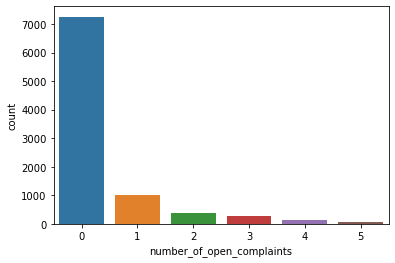

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


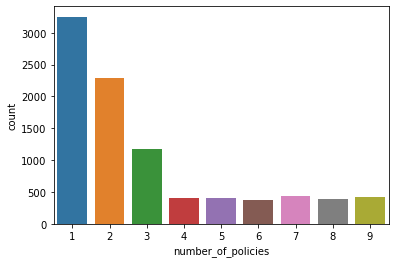

In [21]:
def plot_df(df):
    for col in df.columns:
        sns.countplot(col, data=df)
        plt.show()
plot_df(discrete_df)

## Plotting continuous variables.

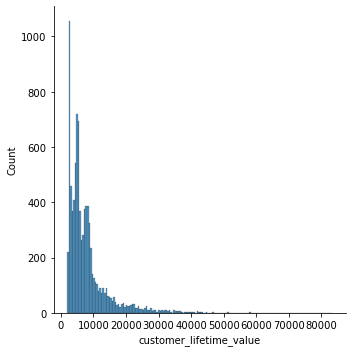

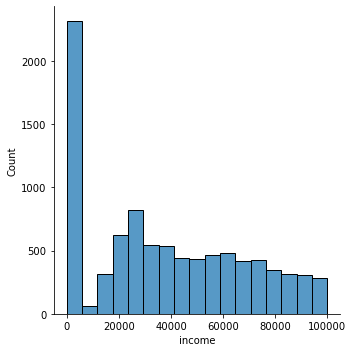

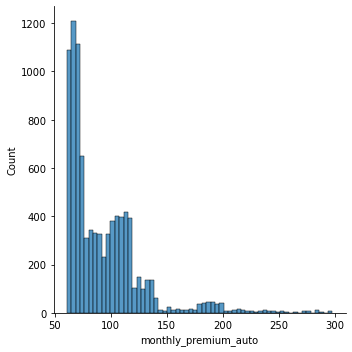

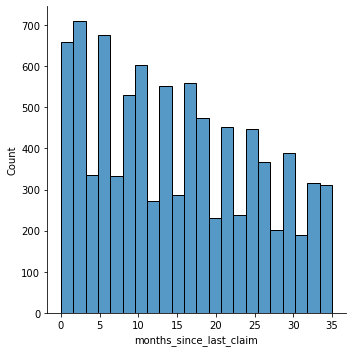

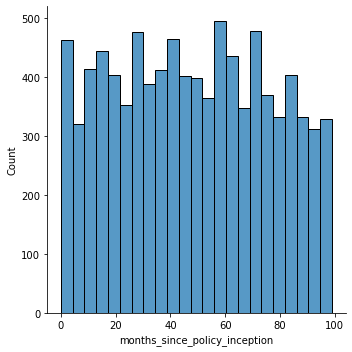

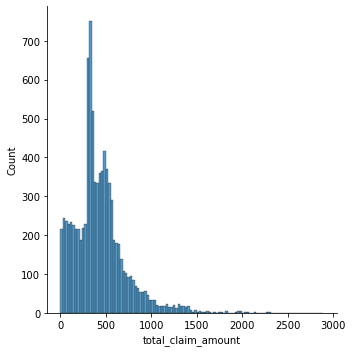

In [22]:
def plot_df(df):
    for col in df.columns:
        sns.displot(df[col])
        plt.show()

plot_df(continuous_df)

Customer_life_time_value=> Exponential,chi2  apply log or Box-Cox.
Income=> I really don't know what to do with income.
monthly_premium_auto=> Exponential, chi2 -not so clear-? 
months_since_last_claim=> There seem to be a cycle for the claims, not sure it could be a normal distribution skewed to the right. Uniform?
months_since_policy_inception=>Idem.Uniform? 
total_claim_amount=>

# Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

## Using log transformation on customer_lifetime_value and monthly_premium_auto.

In [23]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

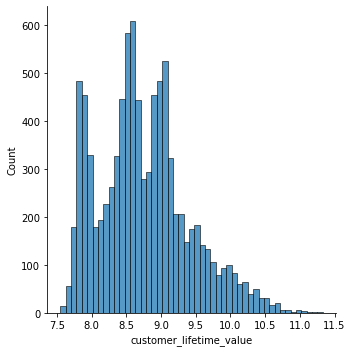

In [24]:
customer_lifetime_value_log = continuous_df['customer_lifetime_value'].apply(lambda x :log_transfom_clean(x))
sns.displot(customer_lifetime_value_log)
plt.show()

In [ ]:
customer_lifetime_value_log.describe()

In [ ]:
monthly_premium_auto_log = continuous_df['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))
sns.displot(monthly_premium_auto_log)
plt.show()

# Using Box-COX transformation on customer_lifetime_value and monthly_premium_auto.

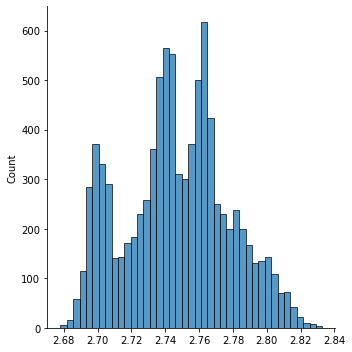

In [26]:
from scipy import stats
xt, lmbda = stats.boxcox(continuous_df['customer_lifetime_value'])
sns.displot(xt)


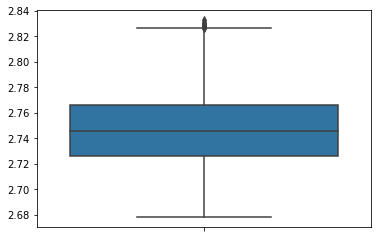

In [27]:
sns.boxplot(y=xt)
plt.show()

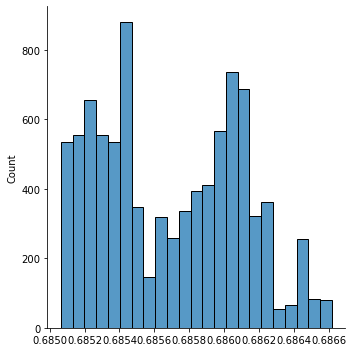

In [28]:
from scipy import stats
xt, lmbda = stats.boxcox(continuous_df['monthly_premium_auto'])
sns.displot(xt)


In [ ]:
Preguntas: 
    1. cómo escribir el código para el boxplot de las variables a las que he aplicado la transformación?
    2. Qué pasa con income? es un problema de escala?
    3. Si hubiera quitado los outliers, me saldrían las distribuciones distintas? 
    4. Se pueden aplicar varias transformaciones, verdad? logaritmos a la serie entera o BoxCox, antes de hacer el split, y después normalizar todo el train set?